### General Imports

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import json
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

### Collecting interpolated and averaged files

In [2]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-BU1.csv', './interpolatedData\\S-BU2.csv']


In [3]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR16 Blocked 1.csv', './stretchedAvgData\\OR16 Blocked 2.csv', './stretchedAvgData\\OR16 Unblocked.csv', './stretchedAvgData\\OR7 Blocked.csv', './stretchedAvgData\\OR7 Unblocked.csv']


### A little bit more data cleaning

In [4]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [5]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [6]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x,parse_dates=[0])

### Plotting average and variance

Text(0.5, 1.0, 'Variance in Particles')

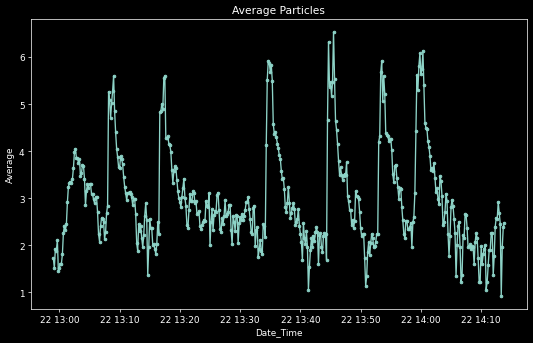

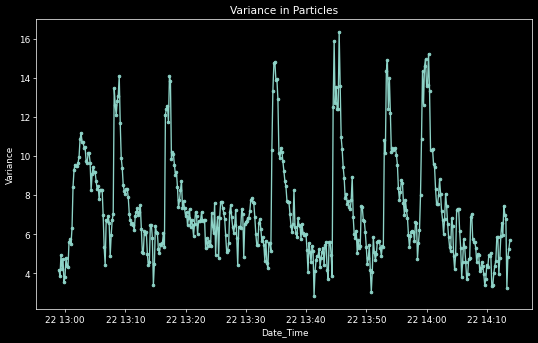

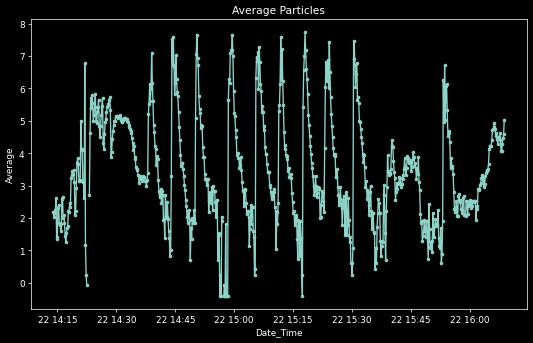

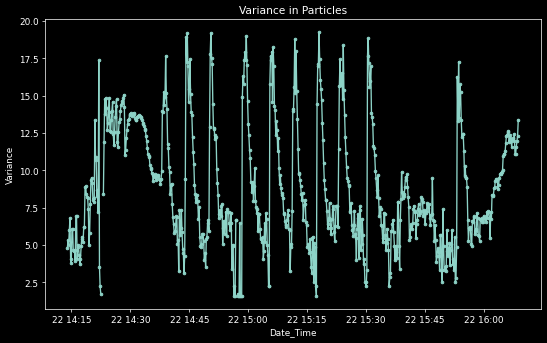

In [7]:
split = 450

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

fig = plt.figure(1, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(4, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

### Looking at each expirements data

In [37]:
indexList = {}
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(3)):
        if i <= 4:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    print(indexList[x],'seconds',x)

90 seconds OR16 Blocked 1
87 seconds OR16 Blocked 2
74 seconds OR16 Unblocked
70 seconds OR7 Blocked
52 seconds OR7 Unblocked


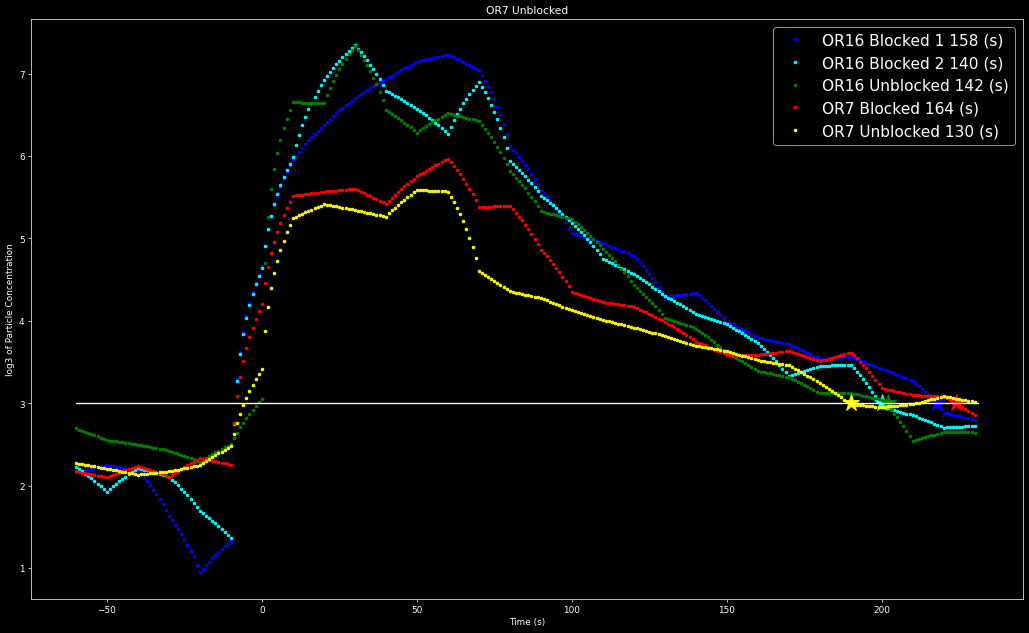

In [36]:
color = ['blue','cyan','green','red','yellow']
thresh = 3
for idx,x in enumerate(stAvgDf):
    fig = plt.figure(0, figsize=(20,12), dpi=64)
    ax = fig.gca()

    ax.plot([i for i in range(-60,len(stAvgDf[x])-60)],np.log(stAvgDf[x]['Average'])/np.log(3),'.',color = color[idx],label = x + ' ' + str(indexList[x]) + ' (s)')
    ax.plot([indexList[x]+60],[thresh],'*',ms=20,color = color[idx])
    # ax.plot([indexList[x],indexList[x]],[0,5])

    # ax.plot([i for i in range(-60,len(stAvgDf[x])-60)],stAvgDf[x]['Average'],'.')
    # ax.plot([indexList[x],indexList[x]],[0,200])

# ax.plot([-60,len(stAvgDf[x])-60],[27,27],color = 'white')
ax.plot([-60,len(stAvgDf[x])-60],[thresh]*2,color = 'white')
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Time (s)')
ax.set_ylabel('log3 of Particle Concentration')
plt.title(x)
mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

In [10]:
stAvgDf[x]['Average']

0      12.119048
1      12.038095
2      11.957143
3      11.876190
4      11.795238
         ...    
286    28.309524
287    28.095238
288    27.880952
289    27.666667
290    27.452381
Name: Average, Length: 291, dtype: float64